# 1.Survival of Haberman's Cancer Patients- EDA

## Details
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Attributes:

1. age: Age of patient at time of operation (numerical)

2. year: Patient's year of operation (year - 1900, numerical)

3. nodes: Number of positive axillary nodes detected (numerical)

4. status: Survival status (class attribute)

    1= the patient survived 5 years or longer

    2= the patient dies within 5 years

## Objective:
Given the age, year and nodes, classify/predict a patient's survival who had undergone surgery for breast cancer.

**Importing packages and libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
print(os.listdir('../input')) #checking input dataset

['haberman.csv']


**Loading Dataset**

In [3]:
haberman_df = pd.read_csv('../input/haberman.csv/haberman.csv')

**Understanding the data**

The top 5 rows of data set can be seen by the head() function. 

In [4]:
haberman_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
print (haberman_df.shape)   #shows datapoints and features                     
print (haberman_df.columns) #displays column names in our dataset

(305, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
haberman_df["status"].value_counts()


1    225
2     80
Name: status, dtype: int64

In [7]:
haberman_df.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

**Observations:**


1.   There are 306 datapoints and 4 features
2.   Haberman dataset is an imbalanced dataset as the number of data points is different ("the number of patients survived 5 years or longer"= 225, "the number of patient died within 5 years"= 80"
3.   The datatype of survival_status is an integer, which is meaningless. It has to be converted to a categorical datatype

In [8]:
print(list(haberman_df['status'].unique())) # print the unique values of the target column(status)

[1, 2]


There are two unique values, '1' and '2' in the status column. So the value '1' can be mapped to ‘YES’ which means the patient survived 5 years or longer and the value '2' can be mapped to ‘NO’ which means the patient died within 5 years.

In [9]:
haberman_df['status'] = haberman_df['status'].map({1:'YES', 2:'NO'}) #mapping the value '1' to 'YES'and value '2' to 'NO'
haberman_df.head() #printing the first 5 records from the dataset.

,age,year,nodes,status
0,30,64,1,YES
1,30,62,3,YES
2,30,65,0,YES
3,31,59,2,YES
4,31,65,4,YES


## Scatter plots
**1-D scatter plot**

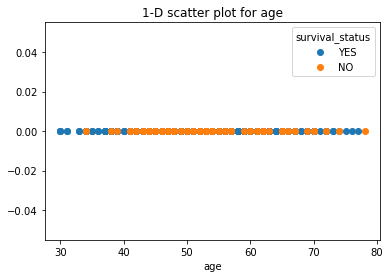

In [10]:
one = haberman_df.loc[haberman_df["status"] == "YES"]
two = haberman_df.loc[haberman_df["status"] == "NO"]
plt.plot(one["age"], np.zeros_like(one["age"]), 'o',label='YES')
plt.plot(two["age"], np.zeros_like(two["age"]), 'o',label='NO')
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend(title="survival_status")
plt.show()

**Observation:**
1. Since a lot of overlapping is seen here, we can't infer much from this 1-D scatter plot

**2-D Scatter Plot**

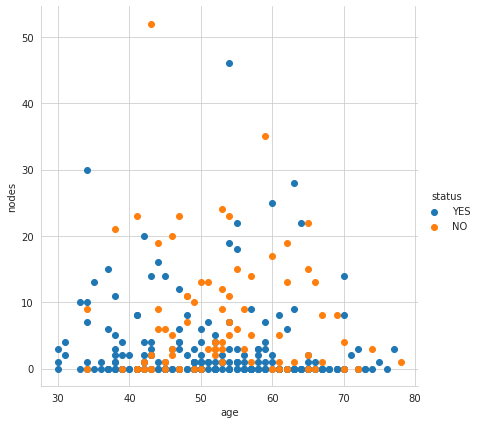

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df, hue="status", height=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();


**Observations:**
1. Seperating the patients_survived from patients_died is harder as they have considerable overlap (they are not linearly separable).

**Pair Plots**

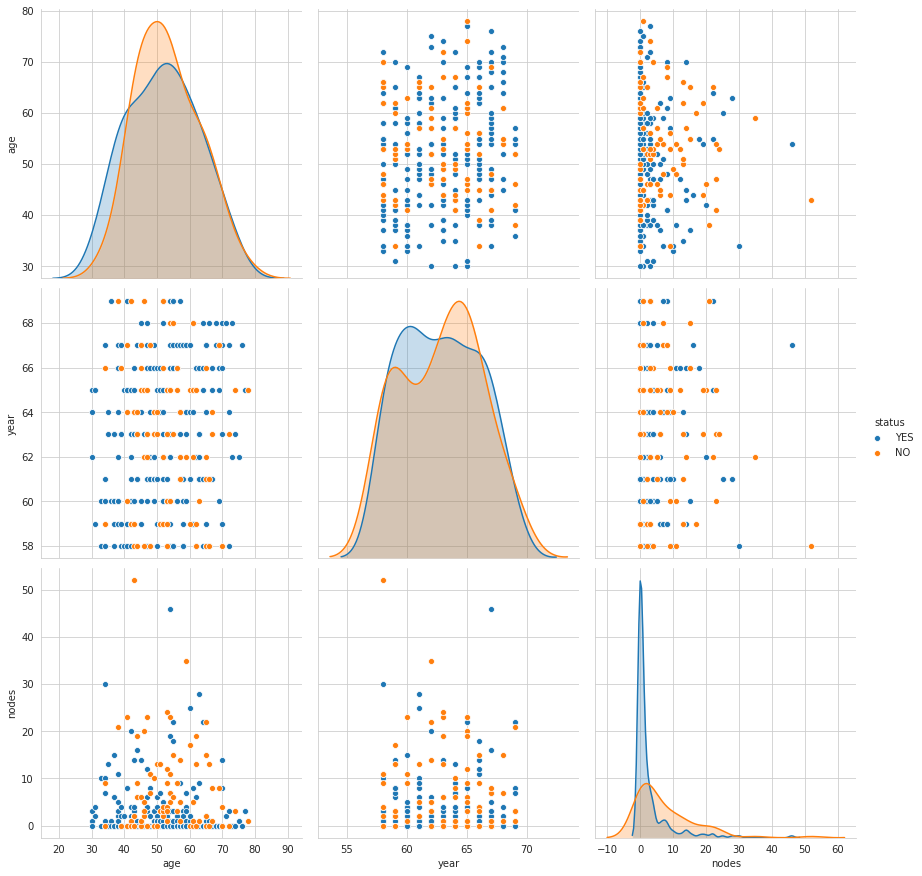

In [12]:
sns.set_style("whitegrid")
sns.pairplot(haberman_df, diag_kind="kde", hue="status", height=4)
plt.show()


**Observation:**


1.   Not much informative, as there is too much of overlapping. Classification is not possible.
2.   The plot between year and nodes is comparatively better.



## Univariant Analysis
**PDF(Probability Density Function)**


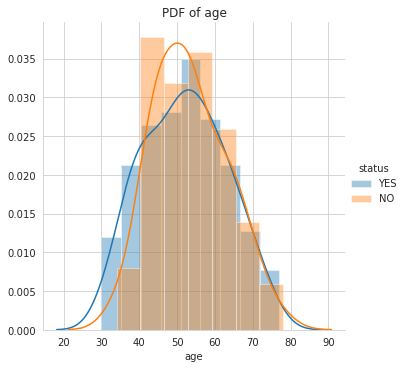

In [13]:
sns.FacetGrid(haberman_df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("PDF of age")
plt.show();

**Observations:**
The PDF of Patients_age shows major overlapping. This tells us that the survival chance of a patient is irrespective of their age. But we can roughly tell that patient's in age group 30-40 are more likely to survive.

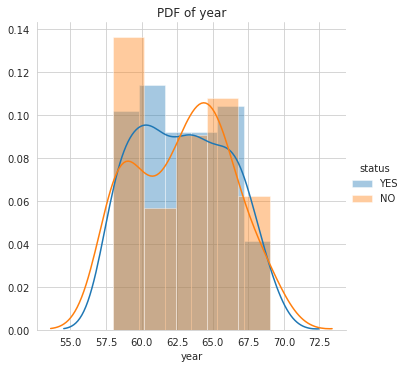

In [14]:
sns.FacetGrid(haberman_df, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("PDF of year")
plt.show();

**Observations:** Here also major overlapping is seen. Also year of operation alone cannot be used as a parameter to determine the patient's survival chance.

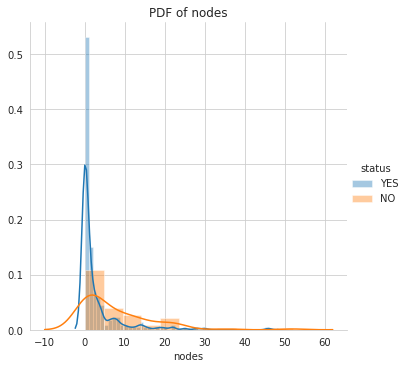

In [15]:
sns.FacetGrid(haberman_df, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("PDF of nodes")
plt.show();

**Observations:**

1.   Overlapping is observed. Hence difficult to classify two classes.
2.   But vaguely we can say that patients with 0 or 1 node are more likely to survive.

**Cumulative Distribution Function(CDF)**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.5625 0.15   0.1375 0.05   0.075  0.     0.0125 0.     0.     0.0125]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


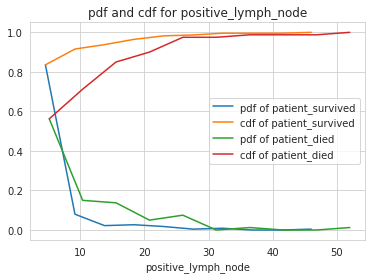

In [16]:
# the patient survived 5 years or longer
counts, bin_edges = np.histogram(one['nodes'], bins=10, density = True)
pdf1 = counts/(sum(counts))
print(pdf1);
print(bin_edges)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges[1:],pdf1)
plt.plot(bin_edges[1:], cdf1)
 
# the patient dies within 5 years
counts, bin_edges = np.histogram(two['nodes'], bins=10, density = True)
pdf2 = counts/(sum(counts))
print(pdf2)
print(bin_edges)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges[1:],pdf2)
plt.plot(bin_edges[1:], cdf2)

label = ["pdf of patient_survived", "cdf of patient_survived", "pdf of patient_died", "cdf of patient_died"]
plt.legend(label)
plt.xlabel("positive_lymph_node")
plt.title("pdf and cdf for positive_lymph_node")
plt.show();

**Observations**: 

1.   There are about 84% of patients_survived that has nodes<=4
2.   About 56% of patients_died has nodes<=4.5



[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.0375 0.075  0.2125 0.1125 0.2    0.1    0.0875 0.1125 0.0375 0.025 ]
[34.  38.4 42.8 47.2 51.6 56.  60.4 64.8 69.2 73.6 78. ]


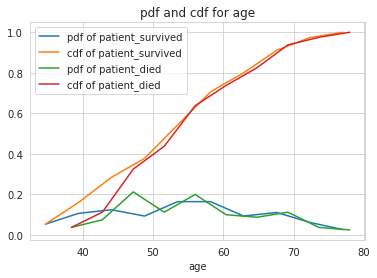

In [17]:
# the patient survived 5 years or longer
counts, bin_edges = np.histogram(one['age'], bins=10, density = True)
pdf1 = counts/(sum(counts))
print(pdf1);
print(bin_edges)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges[1:],pdf1)
plt.plot(bin_edges[1:], cdf1)
 
# the patient dies within 5 years
counts, bin_edges = np.histogram(two['age'], bins=10, density = True)
pdf2 = counts/(sum(counts))
print(pdf2)
print(bin_edges)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges[1:],pdf2)
plt.plot(bin_edges[1:], cdf2)

label = ["pdf of patient_survived", "cdf of patient_survived", "pdf of patient_died", "cdf of patient_died"]
plt.legend(label)
plt.xlabel("age")
plt.title("pdf and cdf for age")
plt.show();

**Observations:**
1.   20% of patients who survived had age<41



**Box_plots**

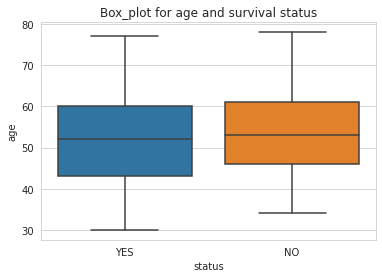

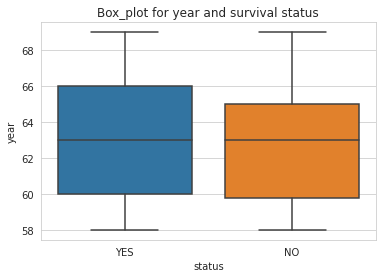

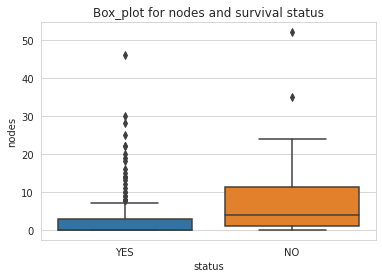

In [18]:
sns.boxplot(x='status',y='age', data=haberman_df)
plt.title("Box_plot for age and survival status")
plt.show()

sns.boxplot(x='status',y='year', data=haberman_df)
plt.title("Box_plot for year and survival status")
plt.show()

sns.boxplot(x='status',y='nodes', data=haberman_df)
plt.title("Box_plot for nodes and survival status")
plt.show()

**Violin Plots**

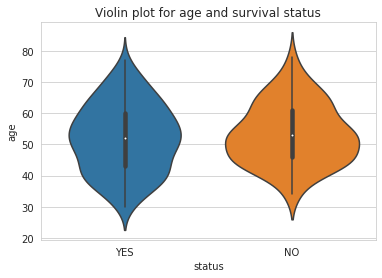

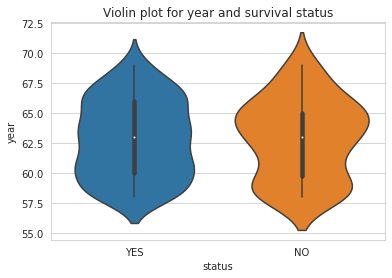

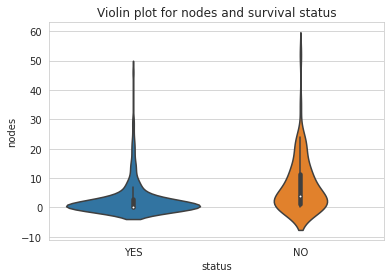

In [19]:
sns.violinplot(x="status", y="age", data=haberman_df, size=8)
plt.title("Violin plot for age and survival status")
plt.show()

sns.violinplot(x="status", y="year", data=haberman_df, size=8)
plt.title("Violin plot for year and survival status")
plt.show()

sns.violinplot(x="status", y="nodes", data=haberman_df, size=8)
plt.title("Violin plot for nodes and survival status")
plt.show()

**Observations:**

1.   More number of patients survived who had 0 to 1 positive axillary nodes. But there is a small frequency of patients who had no nodes died within 5 years of operation. Thus absence of positive axillary nodes doesn't necessarily guarantee survival.
2.   There are more number of patients aged between 50-60 who survived. At the same time a large frequency of patients died lie in the age range of 45-55. Thus age is not an important feature to determine a persons survival chance.




**Contour Plot**

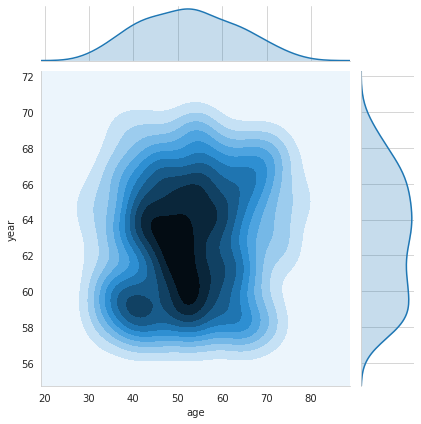

In [20]:
sns.jointplot(x="age", y="year", data=haberman_df, kind="kde");
plt.show();

**Observation:**

1.   The years 1960 to 1964 saw more operations done on patients aged between 45 and 55

## Conclusions:

1.   Haberman datset is not linearly separable since there is too much overlapping in datapoints. Hence difficult to classify classes.
2.   The dataset is imbalanced as it contains unequal number of data-points for each class. Thus it is difficult to classify the survival chance of a patient based on given features.
3.   The number of positive axillary nodes gave us some insight about the survival chance. Zero or less number of nodes in patients indicated more chance of survival. But still the absence of nodes cannot always guarantee survival.



# 2.Survival of Haberman's Cancer Patients-MODELLING 

In [21]:
# check how imbalanced the dataset actually is
from collections import Counter
# summarize the class distribution
target = haberman_df['status'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%s, Percentage=%.3f%%' % (k, v, per))

Class=YES, Count=225, Percentage=73.770%
Class=NO, Count=80, Percentage=26.230%


In [22]:
# retrieve numpy array
haberman_df = haberman_df.values
# split into input and output elements
X, y = haberman_df[:, :-1], haberman_df[:, -1]

# label encode the target variable to have the classes 0 and 1
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [23]:
from sklearn.metrics import brier_score_loss
from numpy import mean
from numpy import std
# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

In [24]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [25]:
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

(305, 3) (305,) Counter({1: 225, 0: 80})


In [26]:
from sklearn.dummy import DummyClassifier
# define the reference model
model = DummyClassifier(strategy='prior')
# evaluate the model
scores = evaluate_model(X, y, model)
print('Mean BSS: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean BSS: 0.536 (0.007)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier

In [28]:
# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # QDA
    models.append(QuadraticDiscriminantAnalysis())
    names.append('QDA')
    # GNB
    models.append(GaussianNB())
    names.append('GNB')
    # MNB
    models.append(MultinomialNB())
    names.append('MNB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    return models, names

>LR 0.565 (0.055)
>LDA 0.566 (0.061)
>QDA 0.549 (0.091)
>GNB 0.544 (0.090)
>MNB 0.440 (0.152)
>GPC 0.467 (0.019)


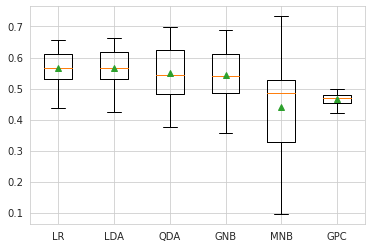

In [29]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
    # plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # QDA
    models.append(QuadraticDiscriminantAnalysis())
    names.append('QDA')
    # GNB
    models.append(GaussianNB())
    names.append('GNB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    return models, names

>LR 0.566 (0.053)
>LDA 0.566 (0.061)
>QDA 0.549 (0.091)
>GNB 0.544 (0.090)
>GPC 0.579 (0.056)


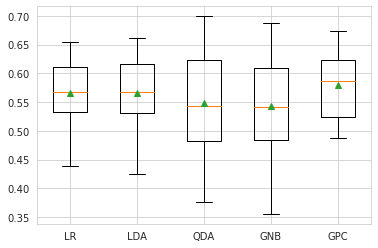

In [31]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # create a pipeline
    pipeline = Pipeline(steps=[('t', StandardScaler()),('m',models[i])])
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Model Evaluation With Power Transform

**Power transforms, such as the Box-Cox and Yeo-Johnson transforms, are designed to change the distribution to be more Gaussian. We can use the PowerTransformer scikit-learn class to perform the Yeo-Johnson transform and automatically determine the best parameters to apply based on the dataset. Importantly, this transformer will also standardize the dataset as part of the transform**

**We have zero values in our dataset, therefore we will scale the dataset prior to the power transform using a MinMaxScaler. Again, we can use this transform in a Pipeline to ensure it is fit on the training dataset and applied to the train and test datasets correctly, without data leakage.**

In [32]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    return models, names

>LR 0.588 (0.058)
>LDA 0.587 (0.067)
>GPC 0.581 (0.058)


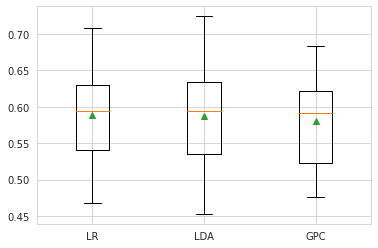

In [33]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # create a pipeline
    steps = [('t1', MinMaxScaler()), ('t2', PowerTransformer()),('m',models[i])]
    pipeline = Pipeline(steps=steps)
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**We can see a further lift in model skill for the three models that were evaluated. We can see that the LR appears to have out-performed the other two methods**

**Make Prediction on New Data**

       We will select the Logistic Regression model with a power transform on the input data as our final model. We can define and fit this model on the entire training dataset

In [34]:
# fit the model
steps = [('t1', MinMaxScaler()),('t2', PowerTransformer()),('m',LogisticRegression(solver='lbfgs'))]
model = Pipeline(steps=steps)
model.fit(X, y)
# some survival cases
print('Survival Cases:')
data = [[31,59,2], [31,65,4], [34,60,1]]
for row in data:
    # make prediction
    yhat = model.predict_proba([row])
    # get percentage of survival
    p_survive = yhat[0, 0] * 100
    # summarize
    print('>data=%s, Survival=%.3f%%' % (row, p_survive))
# some non-survival cases
print('Non-Survival Cases:')
data = [[44,64,6], [34,66,9], [38,69,21]]
for row in data:
    # make prediction
    yhat = model.predict_proba([row])
    # get percentage of survival
    p_survive = yhat[0, 0] * 100
    # summarize
    print('>data=%s, Survival=%.3f%%' % (row, p_survive))

Survival Cases:
>data=[31, 59, 2], Survival=17.021%
>data=[31, 65, 4], Survival=24.197%
>data=[34, 60, 1], Survival=13.686%
Non-Survival Cases:
>data=[44, 64, 6], Survival=37.409%
>data=[34, 66, 9], Survival=38.234%
>data=[38, 69, 21], Survival=48.403%


* We can see that for the chosen survival cases, the probability of survival was high, between 76 percent and 86 percent.
* Then some cases of non-survival are used as input to the model and the probability of survival is predicted.  
* As we might have hoped, the probability of non-survival is modest, hovering around 52 percent to 63 percent.